# Embeddings in linguistic research

In [ ]:
import pandas as pd
import numpy as np

import re
import nltk

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')


## Hotel Reviews Dataset (Booking.com)

In [ ]:
!gdown --id 17mqHu1Yh6kFUgRbOMsZrpo3e1OOrRwMR

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=17mqHu1Yh6kFUgRbOMsZrpo3e1OOrRwMR
To: /content/HotelReviews.zip
100% 47.3M/47.3M [00:02<00:00, 18.7MB/s]


In [ ]:
!unzip HotelReviews.zip

Archive:  HotelReviews.zip
  inflating: Hotel_Reviews.csv       


In [ ]:
df = pd.read_csv('Hotel_Reviews.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [ ]:
my_columns = ['Negative_Review', 'Positive_Review']
hotel_reviews = df[my_columns]

In [ ]:
hotel_reviews.shape

(515738, 2)

In [ ]:
hotel_reviews.head(10)

,Negative_Review,Positive_Review
0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...
1,No Negative,No real complaints the hotel was great great ...
2,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...
3,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...
4,You When I booked with your company on line y...,Amazing location and building Romantic setting
5,Backyard of the hotel is total mess shouldn t...,Good restaurant with modern design great chil...
6,Cleaner did not change our sheet and duvet ev...,The room is spacious and bright The hotel is ...
7,Apart from the price for the brekfast Everyth...,Good location Set in a lovely park friendly s...
8,Even though the pictures show very clean room...,No Positive
9,The aircondition makes so much noise and its ...,The room was big enough and the bed is good T...


## SemCor Corpus

In [ ]:
from nltk.corpus import wordnet
from nltk.corpus import semcor
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import semcor
from nltk.corpus import wordnet as wn 
from nltk.corpus.reader.wordnet import Lemma
from nltk.corpus.reader.wordnet import Synset
from re import sub

In [ ]:
nltk.download('semcor')

[nltk_data] Downloading package semcor to /root/nltk_data...


True

In [ ]:
semcor_words = semcor.words()
# len(semcor_words) #820411

In [ ]:
semcor_chunks = semcor.chunks()
# len(semcor_chunks) #778587

In [ ]:
semcor_sents = semcor.sents()
# len(semcor_sent) #37176

**'great':**
- relatively large in size or number or extent; larger than others of its kind - [large]
- of major significance or importance - [outstanding]
- remarkable or out of the ordinary in degree or magnitude or effect - [extraordinary]
- very good

**'nice':**
- pleasant or pleasing or agreeable in nature or appearance - [pleasant]
- socially or conventionally correct; refined or virtuous - [decent]
- done with delicacy and skill - [skillful]
- excessively fastidious and easily disgusted - [squeamish]
- exhibiting courtesy and politeness - [courteous, gracious]


In [ ]:
n = 37176 #len(semcor.sents())
myword = 'great'

tag – ‘pos’ (part of speech), ‘sem’ (semantic), or ‘both’ to indicate the kind of tags to include. Semantic tags consist of WordNet lemma IDs, plus an ‘NE’ node if the chunk is a named entity without a specific entry in WordNet. (Named entities of type ‘other’ have no lemma. Other chunks not in WordNet have no semantic tag. Punctuation tokens have None for their part of speech tag.)

an example for 'both':
Tree('however.r.01', [Tree('RB', ['However'])]

for 'sem': Tree('however.r.01', ['However'])

for 'pos': Tree('RB', ['However'])

In [ ]:
#extracting sentences including my_word
myword_sent = [] 
myword_index = []
[(myword_sent.append((s)), myword_index.append(i)) 
for s, i in tqdm(zip(semcor.tagged_sents(tag='pos')[:n], range(n))) if myword in str(s)]

print('# sentences contain word "great": ', len(myword_sent))
print(semcor_sents[myword_index[0]])

In [ ]:
myword_sent[0]

In [ ]:
#finding the index of my_word in each sentence to have (greater, greatest, ...)
list_of_myword = []
for i in myword_index:
  idx = ' '.join(semcor_sents[i]).find(myword)
  idx_end = ' '.join(semcor_sents[i]).find(' ', idx)
  if idx_end == -1:
    continue
  list_of_myword.append(' '.join(semcor_sents[i])[idx:idx_end])

list_of_myword = set(list_of_myword)

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', 'Atlanta', "'s", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term', 'end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

## Tokenizing setup

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

In [ ]:
word_tokenize("check's - for %^& above-mentioned")

['check', "'s", '-', 'for', '%', '^', '&', 'above-mentioned']

In [ ]:
a = semcor_sents[109]
print('it' in str(a).lower())

True


## Embedding Phase

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

In [ ]:
def getEmbeding(text , desired_word_em):
  # Run the text through BERT, and collect all of the hidden states produced
  # from all 12 layers. 

  # Convert inputs to PyTorch tensors
  # Mark each of the 22 tokens as belonging to sentence "1".
  marked_text = "[CLS] " + text + " [SEP]"

  # Split the sentence into tokens.
  tokenized_text = tokenizer.tokenize(marked_text)

  # Map the token strings to their vocabulary indeces.
  indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

  for w in desired_word_em:
    try:
      idx = np.where(np.array(tokenized_text) == w)[0][0]
      break
    except:
      pass

  segments_ids = [1] * len(tokenized_text)
  tokens_tensor = torch.tensor([indexed_tokens])
  segments_tensors = torch.tensor([segments_ids])
  
  tokenized_text = tokenizer.tokenize(marked_text)
  with torch.no_grad():

      outputs = model(tokens_tensor, segments_tensors)

      # Evaluating the model will return a different number of objects based on 
      # how it's  configured in the `from_pretrained` call earlier. In this case, 
      # becase we set `output_hidden_states = True`, the third item will be the 
      # hidden states from all layers. See the documentation for more details:
      # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
      hidden_states = outputs[2]
      token_embeddings = torch.stack(hidden_states, dim=0)
      token_embeddings = torch.squeeze(token_embeddings, dim=1)
      token_embeddings = token_embeddings[-1,idx,:]

      return token_embeddings

In [ ]:
# import string
# def remove_puncs(text):
#   text = text.translate(str.maketrans('', '', string.punctuation))
#   text = text.replace('  ',' ')
#   return text

In [ ]:
embs = np.zeros((len(myword_index) , 768))
for i in tqdm(range(len(myword_index))):
  text = ' '.join(semcor_sents[myword_index[i]])
  # text = remove_puncs(text)

  try:
    em = getEmbeding(text, list_of_myword)
    embs[i] = em
  except:
    pass

idx_hold = np.where(np.sum(embs, axis=1) != 0)[0]
embs = embs[idx_hold]

  0%|          | 0/633 [00:00<?, ?it/s]

In [ ]:
embs_review = []

for i in tqdm(range(len(hotel_reviews['Positive_Review'].values))):
  text = hotel_reviews['Positive_Review'].values[i]
  if myword not in text:
    continue
  try:
    em = getEmbeding(text , list_of_myword)
    embs_review.append(em)
  except:
    pass

  if i > 50000:
    break
embs_review_np = np.zeros((len(embs_review), 768))
for  i in range(len(embs_review)):
  embs_review_np[i] = embs_review[i]

# idx_hold = np.where(np.sum(embs,axis=1) != 0)[0]
# embs = embs[idx_hold]

  0%|          | 0/515738 [00:00<?, ?it/s]

## Visualization (PCA and t-SNE)

In [ ]:
# Data-preprocessing: Standardizing the data
# from sklearn.preprocessing import StandardScaler
# standardized_X = StandardScaler().fit_transform(X)
# print(standardized_X.shape)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
# PCA setup
pca = PCA(n_components=5)
pca_array_review = pca.fit_transform(embs_review_np)
pca_array = pca.transform(embs)

In [ ]:
# t-SNE setup
tsne = TSNE(n_components=2)
tsne_array = tsne.fit_transform(np.concatenate((embs_review_np,embs)))
tsne_array_review = tsne_array[:len(embs_review_np)]
tsne_array = tsne_array[len(embs_review_np):]

# help us in ploting the result data)
# tsne_data = np.vstack((tsne_data.T, labels_10000)).T  #if labels are available

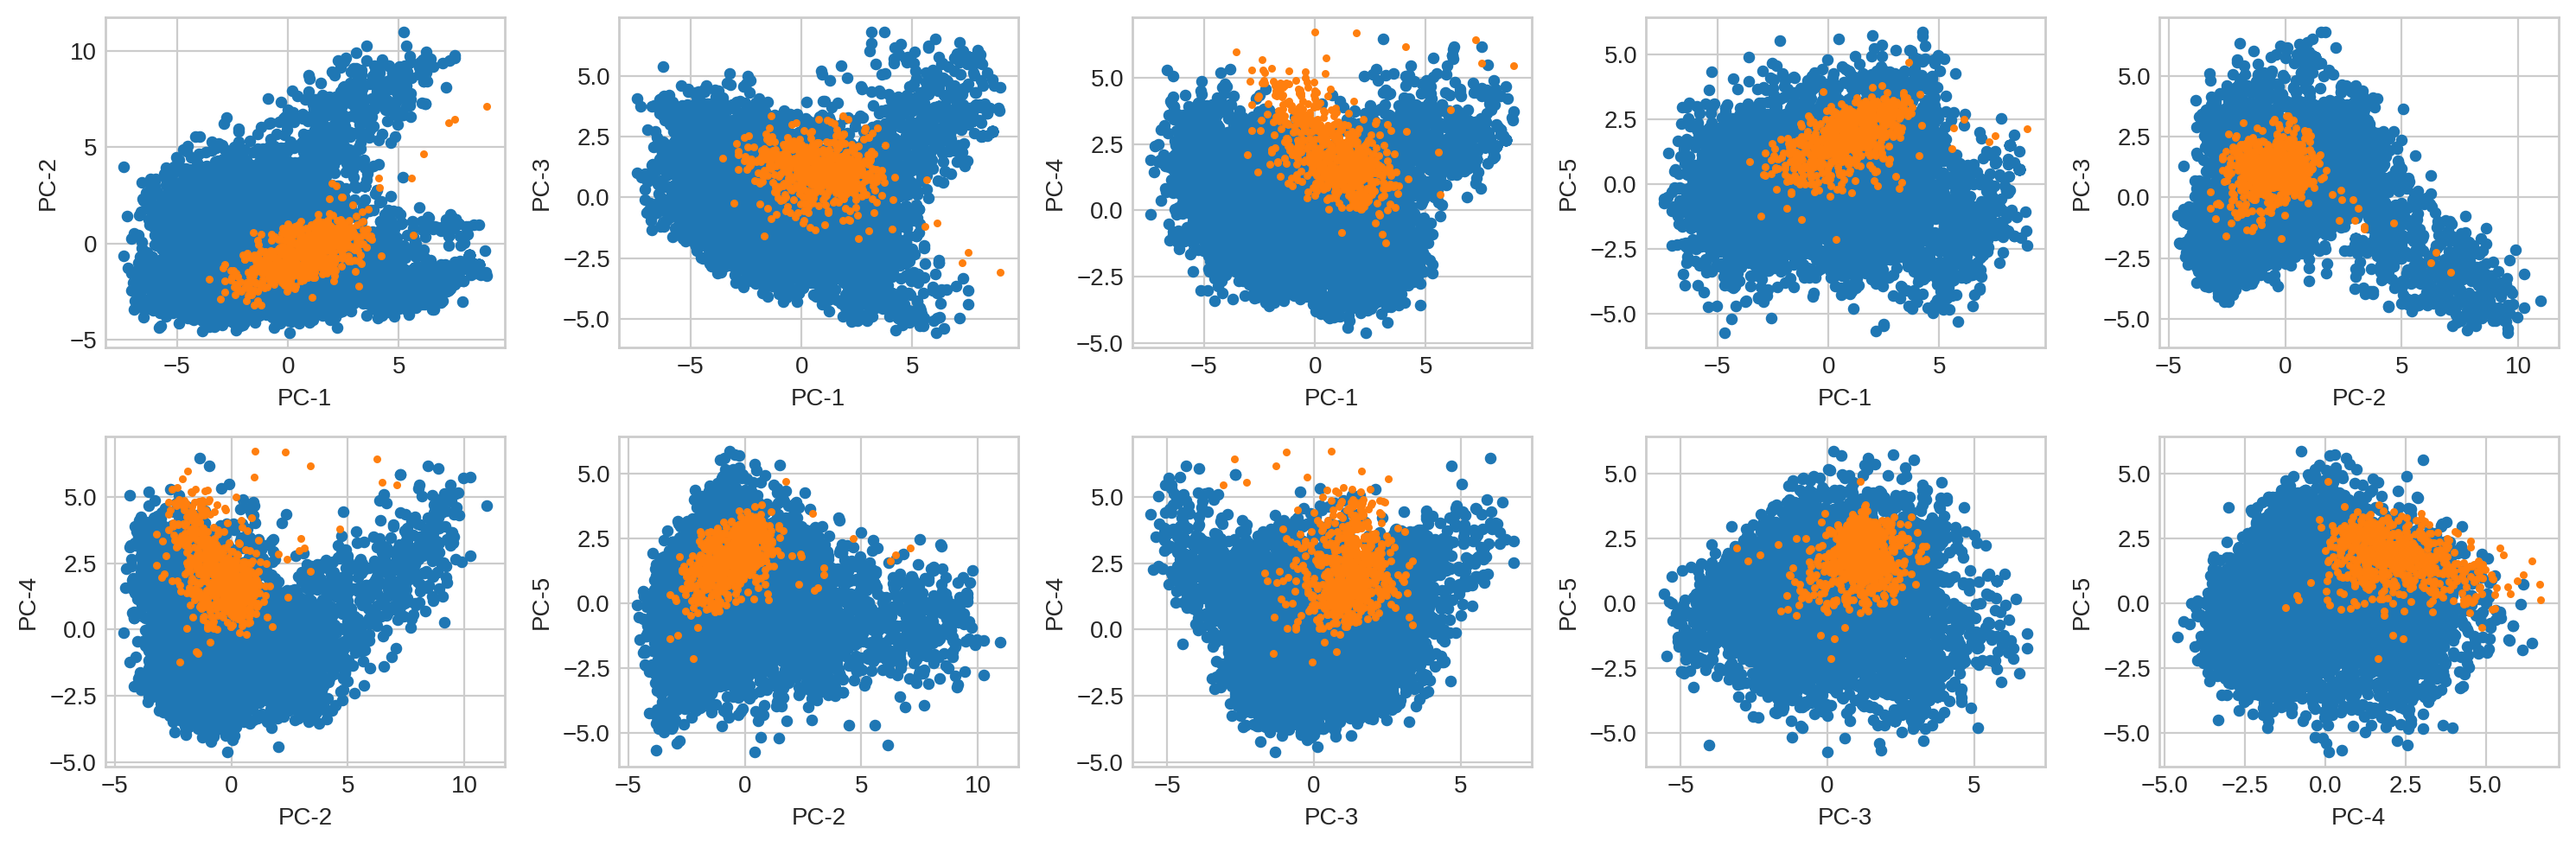

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (15,5), dpi=200)
c_map = plt.cm.get_cmap('jet', 10)

# for i in range(5):
#   plt.subplot(1, 5, i+1)
#   plt.scatter(pca_array[:, i], pca_array[:, i+1], s = 15, cmap = c_map) # , c = labels_10000)
#   plt.colorbar()
#   plt.xlabel('PC-1') , plt.ylabel('PC-2')

# plt.show()
plt.subplot(2, 5, 1)
plt.scatter(pca_array_review[:, 0], pca_array_review[:, 1], s = 15, cmap = c_map) 
plt.scatter(pca_array[:, 0], pca_array[:, 1], s = 5, cmap = c_map)
# plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')



plt.subplot(2, 5, 2)
plt.scatter(pca_array_review[:, 0], pca_array_review[:, 2], s = 15, cmap = c_map) 
plt.scatter(pca_array[:, 0], pca_array[:, 2], s = 5, cmap = c_map)
plt.xlabel('PC-1') , plt.ylabel('PC-3')



plt.subplot(2, 5, 3)
plt.scatter(pca_array_review[:, 0], pca_array_review[:, 3], s = 15, cmap = c_map) 
plt.scatter(pca_array[:, 0], pca_array[:, 3], s = 5, cmap = c_map)
plt.xlabel('PC-1') , plt.ylabel('PC-4')

plt.subplot(2, 5, 4)
plt.scatter(pca_array_review[:, 0], pca_array_review[:, 4], s = 15, cmap = c_map) 
plt.scatter(pca_array[:, 0], pca_array[:, 4], s = 5, cmap = c_map)
plt.xlabel('PC-1') , plt.ylabel('PC-5')




plt.subplot(2, 5, 5)
plt.scatter(pca_array_review[:, 1], pca_array_review[:, 2], s = 15, cmap = c_map) 
plt.scatter(pca_array[:, 1], pca_array[:, 2], s = 5, cmap = c_map)
plt.xlabel('PC-2') , plt.ylabel('PC-3')


plt.subplot(2, 5, 6)
plt.scatter(pca_array_review[:, 1], pca_array_review[:, 3], s = 15, cmap = c_map) 
plt.scatter(pca_array[:, 1], pca_array[:, 3], s = 5, cmap = c_map)
plt.xlabel('PC-2') , plt.ylabel('PC-4')


plt.subplot(2, 5, 7)
plt.scatter(pca_array_review[:, 1], pca_array_review[:, 4], s = 15, cmap = c_map) 
plt.scatter(pca_array[:, 1], pca_array[:, 4], s = 5, cmap = c_map)
plt.xlabel('PC-2') , plt.ylabel('PC-5')


plt.subplot(2, 5, 8)
plt.scatter(pca_array_review[:, 2], pca_array_review[:, 3], s = 15, cmap = c_map) 
plt.scatter(pca_array[:, 2], pca_array[:, 3], s = 5, cmap = c_map)
plt.xlabel('PC-3') , plt.ylabel('PC-4')

plt.subplot(2, 5, 9)
plt.scatter(pca_array_review[:, 2], pca_array_review[:, 4], s = 15, cmap = c_map) 
plt.scatter(pca_array[:, 2], pca_array[:, 4], s = 5, cmap = c_map)
plt.xlabel('PC-3') , plt.ylabel('PC-5')

plt.subplot(2, 5, 10)
plt.scatter(pca_array_review[:, 3], pca_array_review[:, 4], s = 15, cmap = c_map) 
plt.scatter(pca_array[:, 3], pca_array[:, 4], s = 5, cmap = c_map)
plt.xlabel('PC-4') , plt.ylabel('PC-5')

plt.tight_layout()

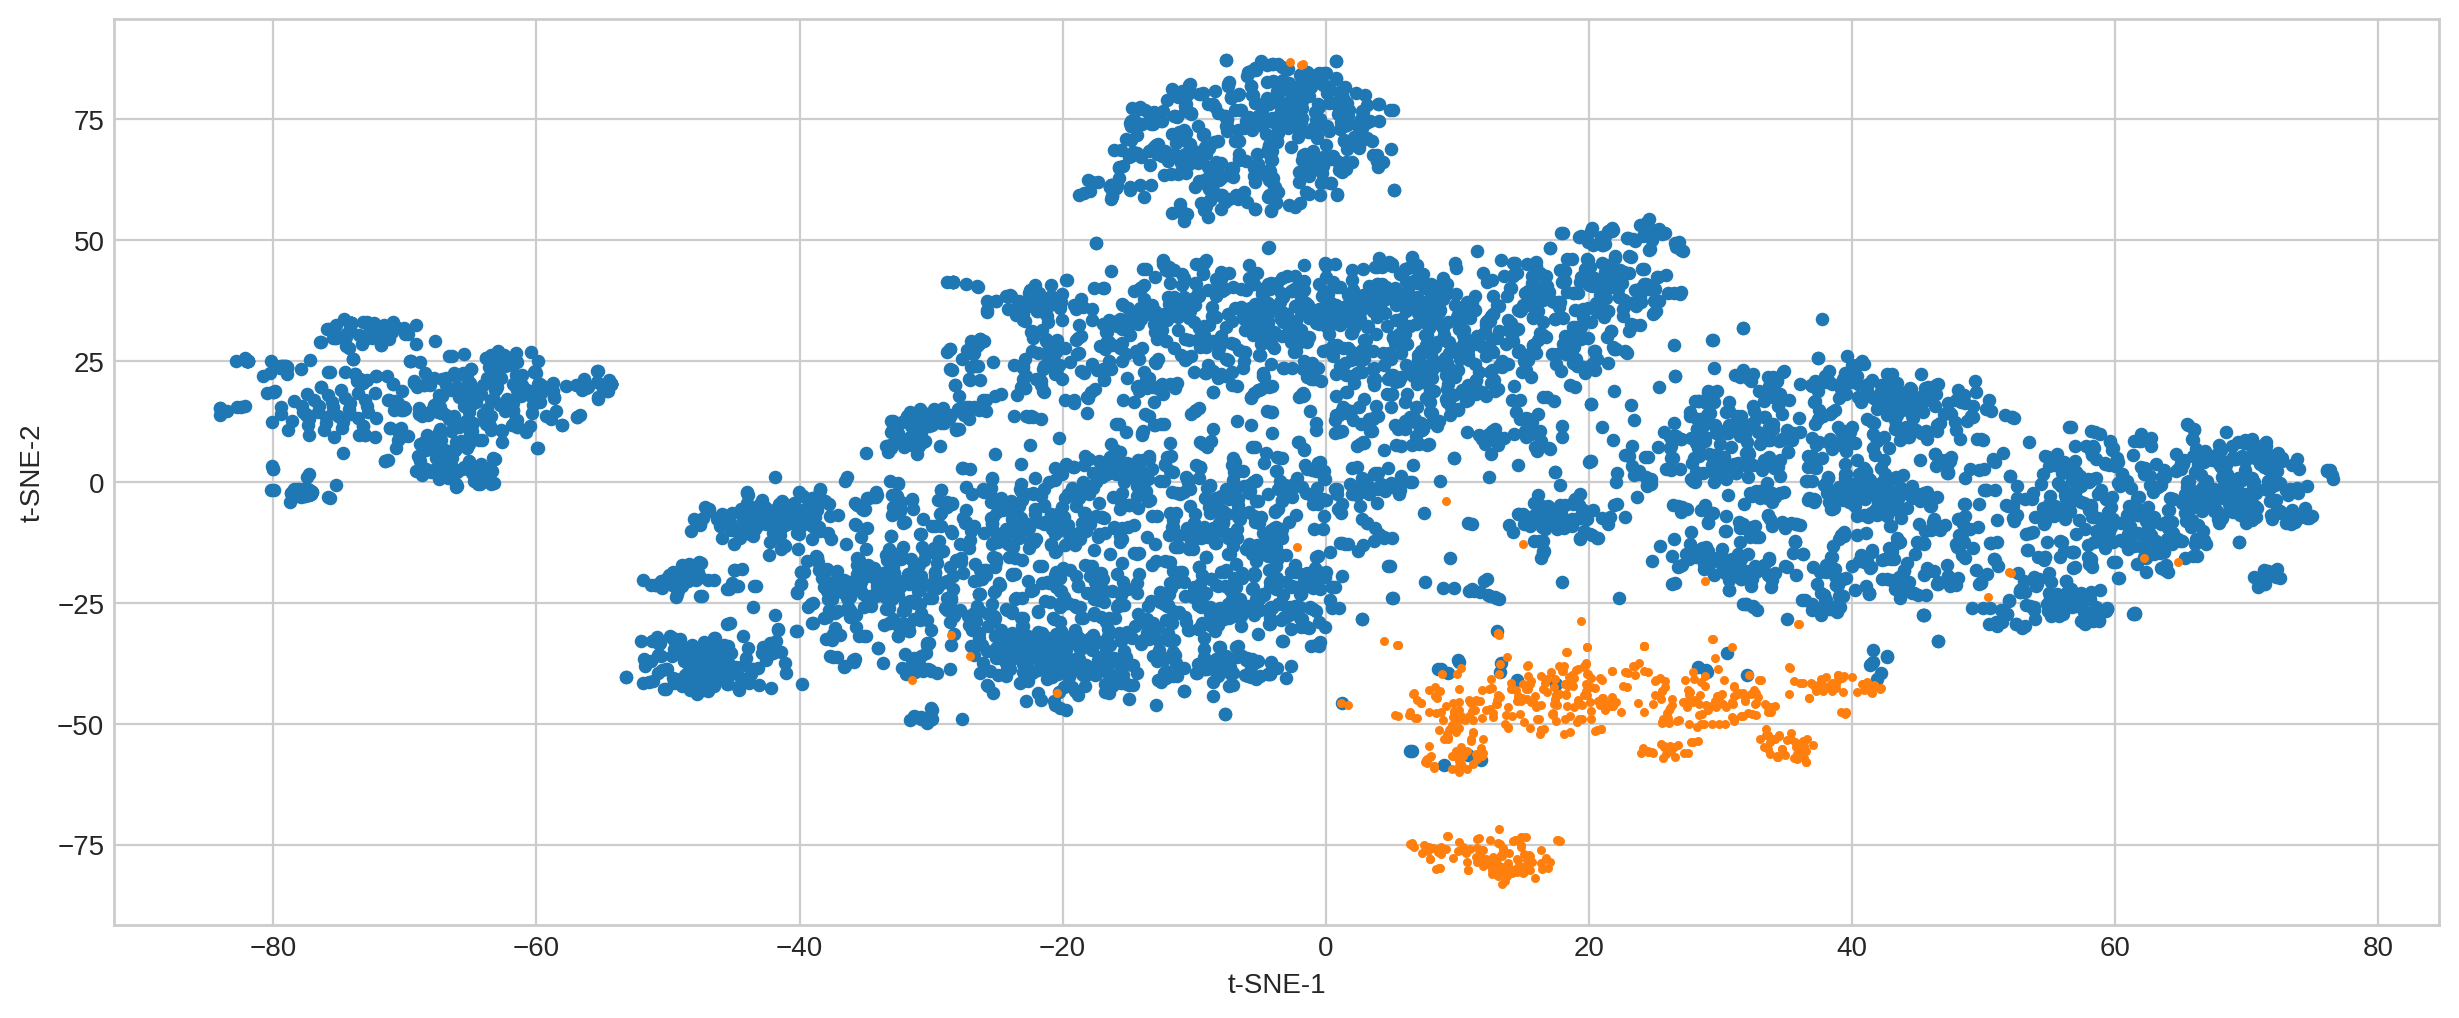

In [ ]:
plt.figure(figsize = (15,6), dpi=200)

plt.scatter(tsne_array_review[:, 0], tsne_array_review[:, 1], s = 15, cmap = c_map) # , c = labels_10000)
plt.scatter(tsne_array[:, 0], tsne_array[:, 1], s = 5, cmap = c_map) # , c = labels_10000)
plt.xlabel('t-SNE-1') , plt.ylabel('t-SNE-2')

plt.show()

## Preprocessing

In [ ]:
# Punctuation 
def removePunctuation(sentences):
    
    tt=""
    sentences2=[]
    for x in sentences:
        tokenizer = RegexpTokenizer('\w+')
        text2=tokenizer.tokenize(x)
       
        cnt=1
        for x2 in text2:
            if cnt==1:
                tt+=x2
                cnt=0
            else:
                tt+=" "+x2    
        sentences2.append(tt)
        tt=""
    return sentences2

In [ ]:
# Stop words
def stopWords(sentences2):
    stop_words = set(stopwords.words("english"))
    context_tab=[]
    for sentence in sentences2:
        words = nltk.word_tokenize(sentence)
        without_stop_words = [word for word in words if not word in stop_words]
        context_tab.append(without_stop_words)
    return context_tab 

In [ ]:
# lemmatizing
def lemmatization(context_tab):
    lemma=[]
    wl=WordNetLemmatizer()
    for x in context_tab:
        m2=[]
        for x2 in x:
            x3=wl.lemmatize(x2,wn.VERB)
            x3=wl.lemmatize(x3,wn.NOUN)
            x3=wl.lemmatize(x3,wn.ADJ)
            x3=wl.lemmatize(x3,wn.ADV)
            m2.append(x3)
        lemma.append(m2)
    return lemma

In [ ]:
# POS tagging
def tagPos(lemma):
    pos=[]
    for n in lemma:
        pos.append(nltk.pos_tag(n))
    return pos

In [ ]:
# woi= word of interest
def wordOfInterest(pos):
    wn_pos=['NN','VB','JJ','JJR','JJS','NNP','VBG','RB','VBD','VBP']

    woi1=[]

    for x in pos:
        arr=[]
        for y in x:
            if y[1] in wn_pos:
                arr.append(y)
        woi1.append(arr) 
    woi=[]


    for i in woi1:
        arr2=[]
        for j in i:

            if j[1]=='VBD' or j[1]=='VB' or j[1]=='VBP':
                tup=(j[0],'v')
                arr2.append(tup)
            elif j[1]=='VBG':
                tup=(j[0],'n')
                arr2.append(tup)
            elif j[1]=='NN' or j[1]=='NNP':
                tup=(j[0],'n')
                arr2.append(tup)
            elif j[1]== 'JJ' or j[1]=='JJR' or j[1]=='JJS':
                tup=(j[0],'a')
                arr2.append(tup)
            elif j[1]=='RB':
                tup=(j[0],'r')
                arr2.append(tup)
        woi.append(arr2)       
            
    return woi

In [ ]:
# Similarity
def sentence_similarity(sentence1WOI,exampleSen):
    print('sentence1WOI ',sentence1WOI,'exampleSen ',exampleSen)
    exampleSentence=[exampleSen]
    examples=removePunctuation(exampleSentence)
    examples=stopWords(examples)
    examples=lemmatization(examples)
    examples=tagPos(examples)
    examples=wordOfInterest(examples)
    
    exsynset=[]

    for i in examples:
        for j in i:
            if len(wn.synsets(j[0], j[1])) != 0:
                exsynset.append(wn.synsets(j[0], j[1])[0])
    
   
    score, count = 0.0, 0
    score1, count1 = 0.0, 0
    # For each word in the first sentence
    for synset in sentence1WOI:
        print('synset ',synset)
        # Get the similarity value of the most similar word in the other sentence
        best_score = max([synset.path_similarity(ss)!=None for ss in exsynset])
 
        # Check that the similarity could have been computed
        if best_score is not None:
            score += best_score
            count += 1
 
    # Average the values
    score /= count
    
    for synset in exsynset:
        # Get the similarity value of the most similar word in the other sentence
        best_score = max([synset.path_similarity(ss)!=None for ss in sentence1WOI])
 
        # Check that the similarity could have been computed
        if best_score is not None:
            score1 += best_score
            count1 += 1
 
    # Average the values
    score1 /= count1
    return (score+score1)/2

In [ ]:
for aword in woi:
    print(aword)
    arr=[]
    cnt = 0
    for j in aword:
        arr.append(wn.synsets(j[0], j[1]))
    for senses in arr:
        for sense in senses:
            val = sentence_similarity(sentences[cnt],example)
            print(val)

NameError: ignored

In [ ]:
# hyponym
hypo=set()
for i in hyponym:
    hypo.add(i.hypernyms()[0])
print(hypo) 
context=[]
context.append(wn.synsets('open',pos='a')[0])
context.append(wn.synsets('account',pos='n')[0])
print(context[0])
p=0
for i in hypo:
    for s in context:
        a=i.path_similarity(s)
        b=s.path_similarity(i)
        if a is None:
            a=0
        if b is None:
            b=0
        a=a+b
        p=p+(a/2)
    print(i,i.definition(),p/2)